<center>
<h1> Wilson The Cryptohamster </h1>
<h2>Trading Cryptocurrency with the Power of a cute Syrian Hamster</h2>
<hr>
<h1>Exploratory Data Analysis</h1>
<hr>
</center>

In this Notebook, we explore the raw data created from the hamster wheel sensor. The goals are as follows:

1. Determine the parameters used for the decision process (e.g., timeout between two wheel runs, speed, distance).
2. Find out how much Wilson travels on a usual night.

# Install dependencies

In [92]:
%pip install pandas numpy matplotlib seaborn pymysql

You should consider upgrading via the '/Users/HeikoKromer/.pyenv/versions/3.10.3/envs/wilsonisahamster/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.dpi'] = 200
pd.options.mode.chained_assignment = None


In [94]:
# Database connection strings
DATABASE = 'cryptohamster'
HOST = '192.168.1.105'
PORT = 3306
TABLE = 'hamsterwheel'
FULL_PATH_TO_CREDENTIALS = './../credentials.cred'

In [95]:
# Load credentials to connect to db
with open(FULL_PATH_TO_CREDENTIALS) as f:
    lines = f.readlines()
    f.close()
user = lines[0].split(':')[1].strip()
password = lines[1].split(':')[1].strip()

mysql_connection = pymysql.connect(
    host=HOST,
    user=user,
    password=password,
    db=DATABASE,
    port=PORT,
    charset='utf8'
)
                    
query = "SELECT * FROM hamsterwheel"
df = pd.read_sql(
    sql=query,
    con=mysql_connection,
    index_col='hamsterwheel_id'
)

/Users/HeikoKromer/.pyenv/versions/3.10.3/envs/wilsonisahamster/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [96]:
df.dtypes

time    datetime64[ns]
flag             int64
dtype: object

In [97]:
df.sort_values(by=['time'], ascending=False).head()

,time,flag
hamsterwheel_id,,
13962,2022-05-29 22:07:16.846059,1
13961,2022-05-29 22:07:16.823971,1
13960,2022-05-29 22:07:15.040997,1
13959,2022-05-29 22:07:15.018632,1
13958,2022-05-29 22:07:13.220475,1


In [98]:
df['diff'] = (df['time'] - df['time'].shift(1))
df['diff_ms'] = df['diff'].dt.total_seconds() * 1e3
df['diff_s'] = df['diff'].dt.total_seconds()
print(df.shape)
df.head()

(13962, 5)


,time,flag,diff,diff_ms,diff_s
hamsterwheel_id,,,,,
1,2022-05-10 20:15:21.322404,1,NaT,NaN,NaN
2,2022-05-10 20:15:21.339877,1,0 days 00:00:00.017473,17.473,0.017473
3,2022-05-10 20:15:21.361067,1,0 days 00:00:00.021190,21.190,0.021190
4,2022-05-10 20:15:21.515871,1,0 days 00:00:00.154804,154.804,0.154804
5,2022-05-10 20:15:21.537691,1,0 days 00:00:00.021820,21.820,0.021820


In [99]:
min_threshold = 0.8
max_threshold = 10
df[df['diff_s'] > max_threshold]


,time,flag,diff,diff_ms,diff_s
hamsterwheel_id,,,,,
108,2022-05-28 19:43:40.946155,1,17 days 23:28:13.853791,1.553294e+09,1.553294e+06
9625,2022-05-28 21:46:29.741803,1,0 days 01:59:17.897565,7.157898e+06,7.157898e+03
9737,2022-05-28 21:47:02.159859,1,0 days 00:00:10.143605,1.014361e+04,1.014361e+01
10018,2022-05-28 21:47:30.100380,1,0 days 00:00:21.106553,2.110655e+04,2.110655e+01
10042,2022-05-28 22:22:22.127748,1,0 days 00:34:51.506724,2.091507e+06,2.091507e+03
10263,2022-05-28 22:22:38.925047,1,0 days 00:00:11.881229,1.188123e+04,1.188123e+01
11662,2022-05-28 22:28:04.334715,1,0 days 00:04:43.010350,2.830104e+05,2.830104e+02
11722,2022-05-28 22:29:56.770192,1,0 days 00:00:55.867524,5.586752e+04,5.586752e+01
11750,2022-05-28 22:43:59.053948,1,0 days 00:13:37.672696,8.176727e+05,8.176727e+02


In [100]:
m = (df['diff_s'] < max_threshold) & (df['diff_s'] > min_threshold)
df = df.loc[m]
df.shape

(843, 5)

In [101]:
df[df['diff_s'] > threshold].shape

(21, 5)

<AxesSubplot:xlabel='diff_s', ylabel='Count'>

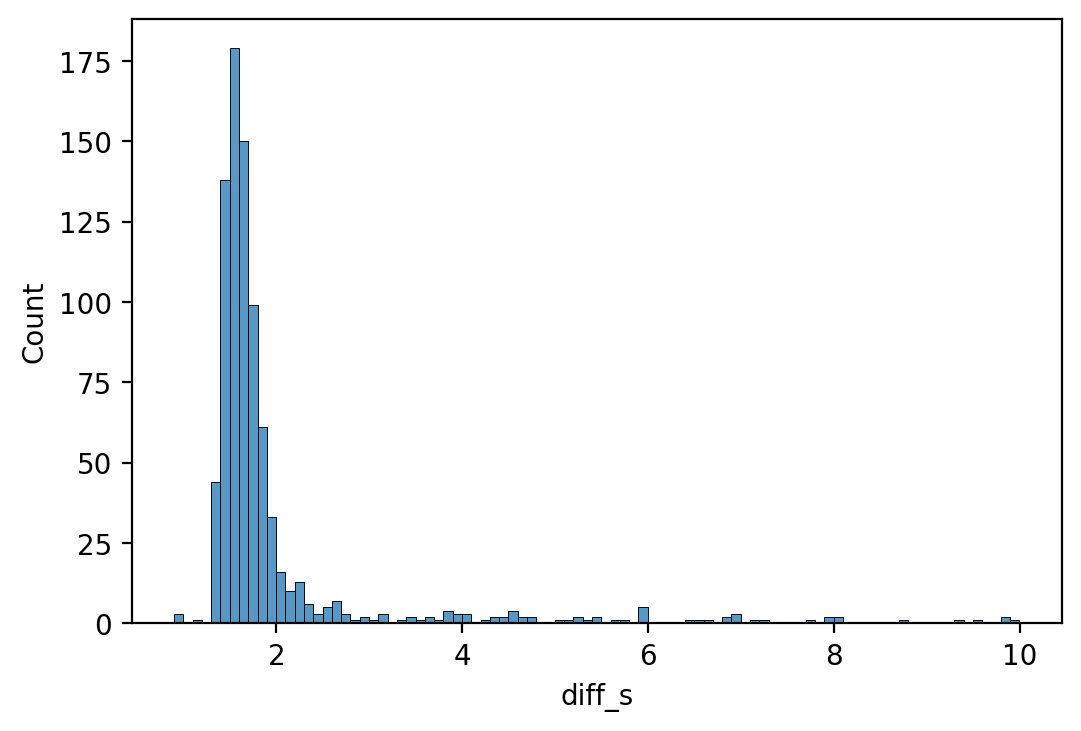

In [102]:
sns.histplot(data=df, x='diff_s', binwidth=0.1)

<AxesSubplot:xlabel='diff_s'>

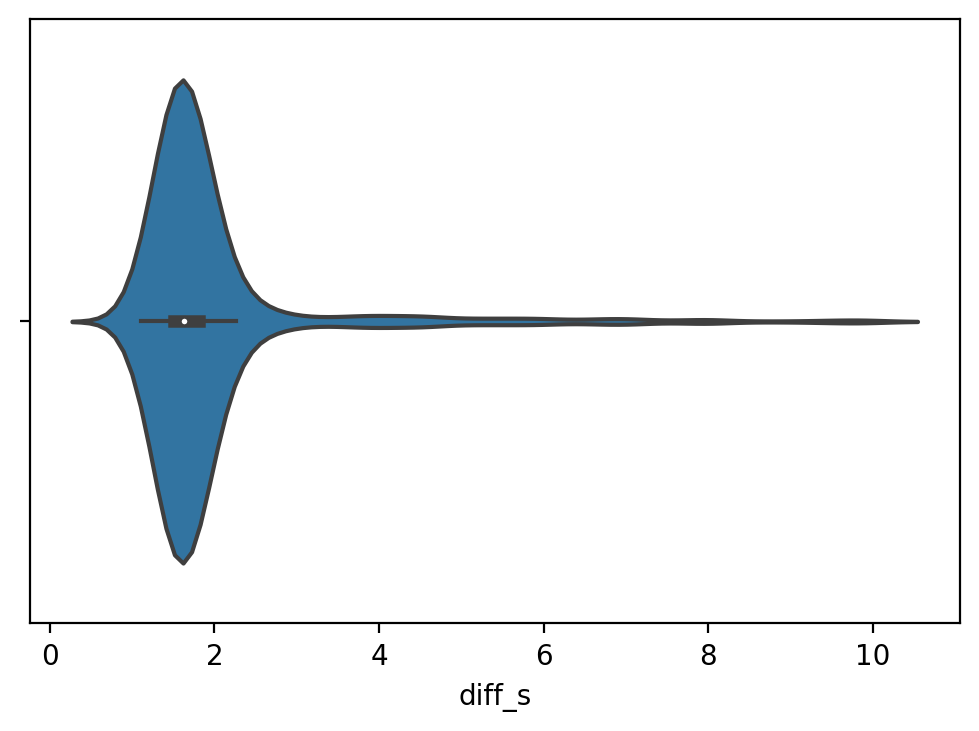

In [103]:
sns.violinplot(x=df["diff_s"])